In [39]:
from keras import backend as K
K.clear_session()
%reset out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (12 entries)


In [40]:
from keras.models import Model
from keras.models import model_from_json
import numpy as np
import os
import cv2
from PIL import Image
import glob
import matplotlib.pyplot as plt
from load_dataset import load_dataset

In [41]:
class feature_extractor:
    def __init__(self, model_path, model_name, model_weights, img_width, img_height, root_imgs, print_mdl ):
        self.model_path = model_path
        self.model_name = model_name
        self.model_weights = model_weights
        self.img_width = img_width
        self.img_height = img_height
        #self.list_imgs = glob.glob(root_imgs)
        
        self.my_gen = load_dataset(root_imgs, self.img_width, self.img_height, 3, batch_size=16)
        
        # load json of the model
        json_file = open(os.path.join(self.model_path, self.model_name), 'r')
        loaded_model_json = json_file.read()
        json_file.close()

        # create the model
        self.model = model_from_json(loaded_model_json)
        if print_mdl:
            print(self.model.summary())

        # load the weights
        self.model.load_weights(os.path.join(self.model_path, self.model_weights))
        

            
    def extract_features(self, layer):            

        model_extractFeatures = Model(outputs=self.model.get_layer(layer).output, inputs=self.model.input )
        gen = self.my_gen.data2predict()
        features = model_extractFeatures.predict_generator(gen, steps=10)
        return features
        
        

In [69]:
#model_path = '/home/cvblab03/Documents/fine-tuning_Chen/ModelsByFold_Chen/Chen/Fold0/'
model_path = 'modelResNet50/'
model_name = 'Fold_0model.json'
model_weights = 'Fold_0ResNet50_Batch8final_weights.h5'
img_width = 224
img_height = 224
root_imgs = 'croppedMESSIDOR/*'

In [70]:
# Declaring the object
extractor = feature_extractor(model_path, model_name, model_weights, img_width, img_height, root_imgs, print_mdl=True )

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [71]:
# Extracting the features
featsC1 = extractor.extract_features('conv1')

In [72]:
featsC2 = extractor.extract_features('res2b_branch2b')

In [73]:
featsC3 = extractor.extract_features('bn2c_branch2a')

In [74]:
featsC4 = extractor.extract_features('res3a_branch2b')

In [75]:
K.clear_session()

In [76]:
print(featsC1.shape)

(160, 112, 112, 64)


(112, 112)


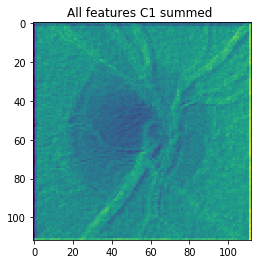

In [77]:
allFe = np.sum(featsC1[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C1 summed ')
plt.imshow(allFe)

(55, 55)


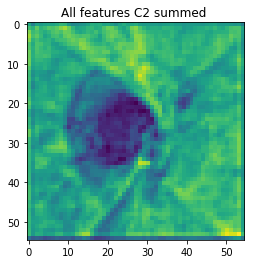

In [78]:
allFe = np.sum(featsC2[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C2 summed ')
plt.imshow(allFe)

(55, 55)


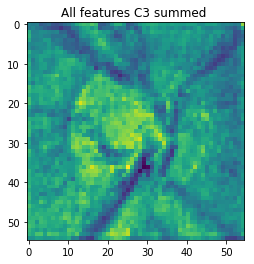

In [79]:
allFe = np.sum(featsC3[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C3 summed ')
plt.imshow(allFe)

(28, 28)


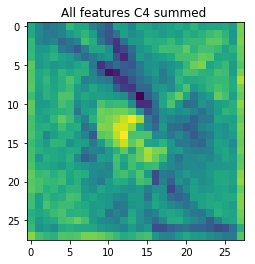

In [80]:
allFe = np.sum(featsC4[1,:,:,:], axis=2)
print(allFe.shape)
plt.title('All features C4 summed ')
plt.imshow(allFe)